In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import os

path = os.path.join("dataset", "train.csv")

In [4]:
data = pd.read_csv(path)
data.head(3)

C:\Users\admin\AppData\Local\Temp\ipykernel_3544\3246910183.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0


In [5]:
data.shape

(110938, 190)

In [6]:
# No drop. Clean the dataset and fill NA vals
#data.dropna(inplace= True)
#data.shape

# Features in original dataset

In [7]:
for i in data.columns:
    print(i)

id
target
home_team_name
away_team_name
match_date
league_name
league_id
is_cup
home_team_coach_id
away_team_coach_id
home_team_history_match_date_1
home_team_history_match_date_2
home_team_history_match_date_3
home_team_history_match_date_4
home_team_history_match_date_5
home_team_history_match_date_6
home_team_history_match_date_7
home_team_history_match_date_8
home_team_history_match_date_9
home_team_history_match_date_10
home_team_history_is_play_home_1
home_team_history_is_play_home_2
home_team_history_is_play_home_3
home_team_history_is_play_home_4
home_team_history_is_play_home_5
home_team_history_is_play_home_6
home_team_history_is_play_home_7
home_team_history_is_play_home_8
home_team_history_is_play_home_9
home_team_history_is_play_home_10
home_team_history_is_cup_1
home_team_history_is_cup_2
home_team_history_is_cup_3
home_team_history_is_cup_4
home_team_history_is_cup_5
home_team_history_is_cup_6
home_team_history_is_cup_7
home_team_history_is_cup_8
home_team_history_is_cup

In [8]:
data = data.drop(columns= ["home_team_name", "away_team_name", "league_name"])

In [9]:
print(data.isna().sum().value_counts)

<bound method IndexOpsMixin.value_counts of id                                    0
target                                0
match_date                            0
league_id                             0
is_cup                                1
                                  ...  
away_team_history_league_id_6      8426
away_team_history_league_id_7      9867
away_team_history_league_id_8     11295
away_team_history_league_id_9     12762
away_team_history_league_id_10    14216
Length: 187, dtype: int64>


<AxesSubplot:xlabel='target', ylabel='Count'>

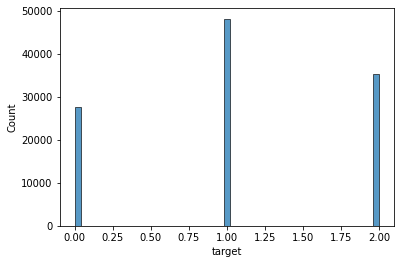

In [10]:
# "target" to categorial ['away' = 2, 'home' = 1, 'draw' = 0]

data["target"] = np.where(data["target"] == "away", 2, data["target"])
data["target"] = np.where(data["target"] == "home", 1, data["target"])
data["target"] = np.where(data["target"] == "draw", 0, data["target"])

sns.histplot(data= data["target"])

## Cleaning and visualizing usefull values

In [11]:
train_set = data[['target',
'home_team_history_rating_1',
 'home_team_history_rating_2',
 'home_team_history_rating_3',
 'home_team_history_rating_4',
 'home_team_history_rating_5',
 'home_team_history_rating_6',
 'home_team_history_rating_7',
 'home_team_history_rating_8',
 'home_team_history_rating_9',
 'home_team_history_rating_10',
'away_team_history_rating_1',
 'away_team_history_rating_2',
 'away_team_history_rating_3',
 'away_team_history_rating_4',
 'away_team_history_rating_5',
 'away_team_history_rating_6',
 'away_team_history_rating_7',
 'away_team_history_rating_8',
 'away_team_history_rating_9',
 'away_team_history_rating_10']]

### Home team history features

In [37]:
for i in range(1,11):
    print(f"home_team_history_rating_{i} NA = " + str(train_set[f'home_team_history_rating_{i}'].isna().sum()))

home_team_history_rating_1 NA = 0
home_team_history_rating_2 NA = 0
home_team_history_rating_3 NA = 0
home_team_history_rating_4 NA = 0
home_team_history_rating_5 NA = 0
home_team_history_rating_6 NA = 0
home_team_history_rating_7 NA = 0
home_team_history_rating_8 NA = 0
home_team_history_rating_9 NA = 0
home_team_history_rating_10 NA = 0


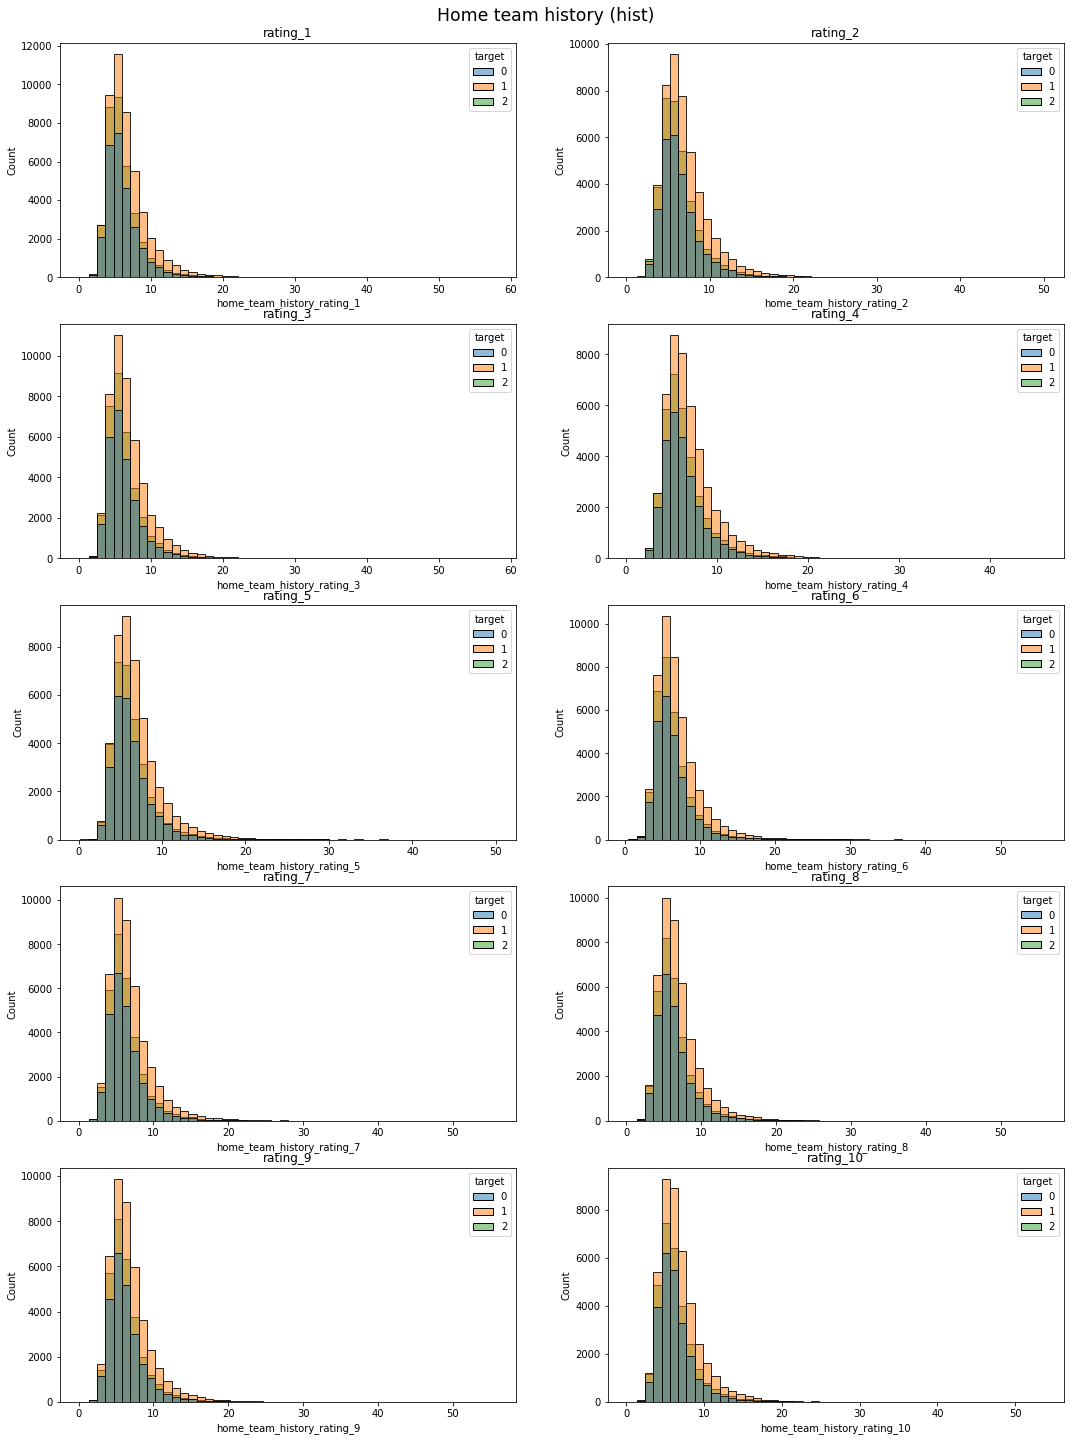

In [27]:
fig, axs = plt.subplots(5, 2, figsize= (18,25))

fig.suptitle("Home team history (hist)", size= "xx-large", y = 0.9)

cnt = 0
for i in range(0,10):
    sns.histplot(data = train_set, x= train_set[f'home_team_history_rating_{i+1}'], hue= train_set['target'], bins= 50, 
             palette= "tab10", ax= axs[cnt % 5][i % 2]).set_title(f'rating_{i+1}')

    if((i+1) % 2 == 0):
        cnt+=1

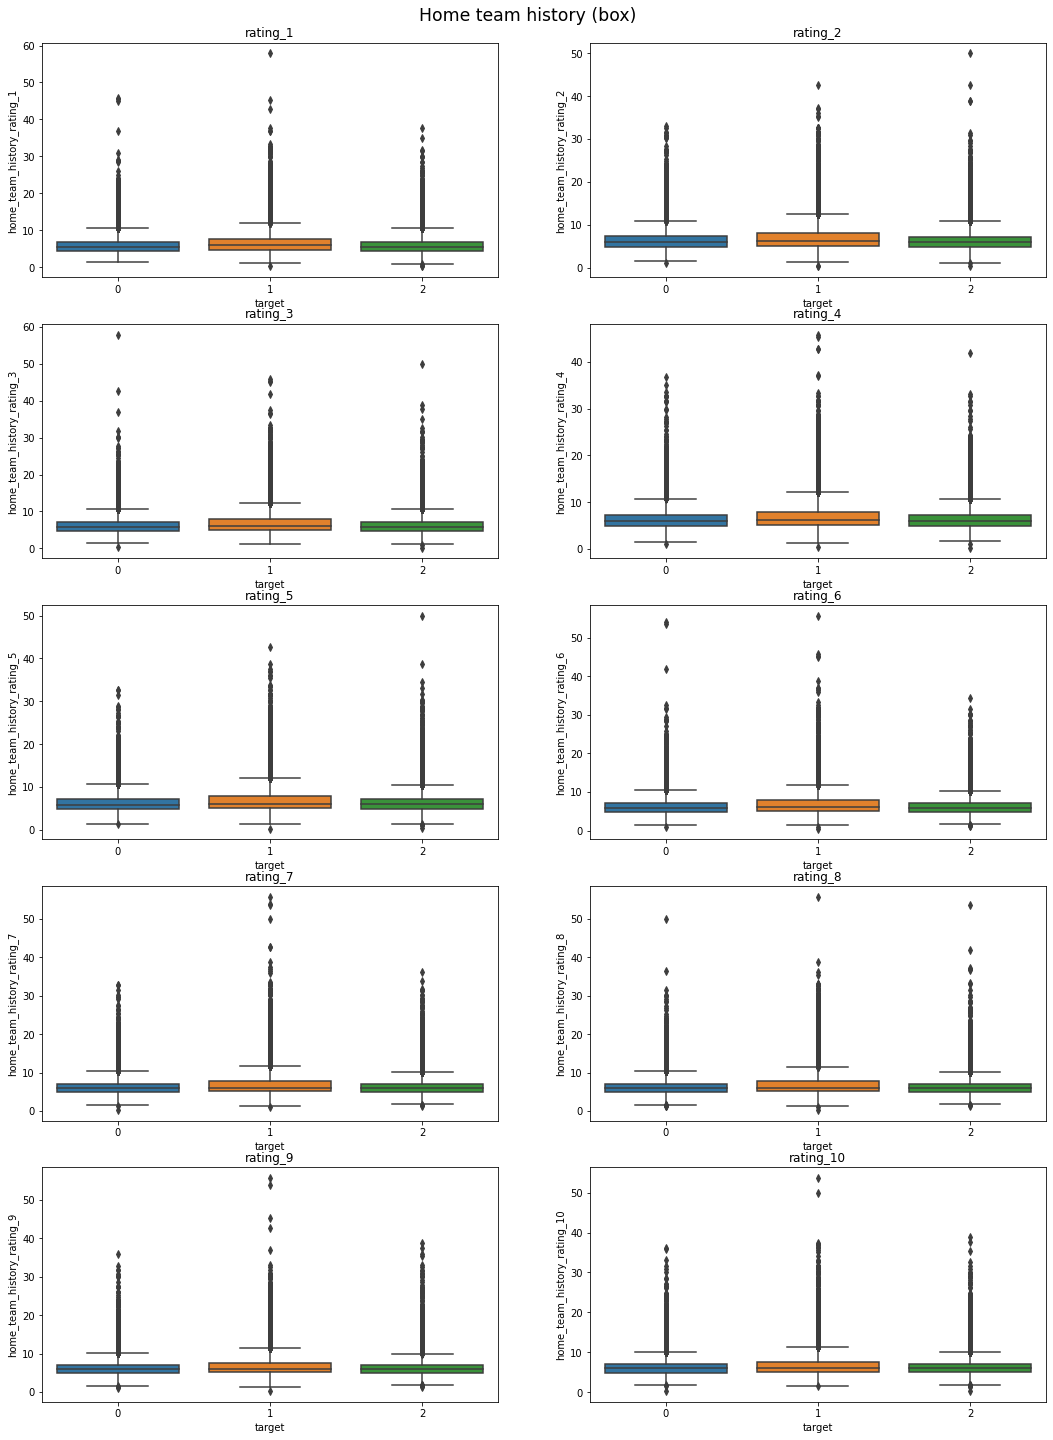

In [40]:
fig, axs = plt.subplots(5, 2, figsize= (18,25))

fig.suptitle("Home team history (box)", size= "xx-large", y = 0.9)

cnt = 0
for i in range(0,10):
    sns.boxplot(data = train_set, y= train_set[f'home_team_history_rating_{i+1}'], x= train_set['target'], 
             palette= "tab10", ax= axs[cnt % 5][i % 2]).set_title(f'rating_{i+1}')

    if((i+1) % 2 == 0):
        cnt+=1

In [29]:
# Median HTR array

arr_home_team_r_median = []
for i in range(1,11):
    arr_home_team_r_median.append(train_set[f'home_team_history_rating_{i}'].median())


In [34]:
# Fill all HTR{i} with median

for i in range(1,11):
    train_set[f'home_team_history_rating_{i}'] = train_set[f'home_team_history_rating_{i}'].fillna(arr_home_team_r_median[i-1])


for i in range(1,11):
    print(f'home_team_history_rating_{i} N_isna = ' + (str(train_set[f'home_team_history_rating_{i}'].isna().sum())))

home_team_history_rating_1 N_isna = 0
home_team_history_rating_2 N_isna = 0
home_team_history_rating_3 N_isna = 0
home_team_history_rating_4 N_isna = 0
home_team_history_rating_5 N_isna = 0
home_team_history_rating_6 N_isna = 0
home_team_history_rating_7 N_isna = 0
home_team_history_rating_8 N_isna = 0
home_team_history_rating_9 N_isna = 0
home_team_history_rating_10 N_isna = 0


C:\Users\admin\AppData\Local\Temp\ipykernel_3544\644854135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[f'home_team_history_rating_{i}'] = train_set[f'home_team_history_rating_{i}'].fillna(arr_home_team_r_median[i-1])


### Away team history features

In [38]:
for i in range(1,11):
    print(f"away_team_history_rating_{i} NA = " + str(train_set[f'away_team_history_rating_{i}'].isna().sum()))

away_team_history_rating_1 NA = 1239
away_team_history_rating_2 NA = 2603
away_team_history_rating_3 NA = 4047
away_team_history_rating_4 NA = 5525
away_team_history_rating_5 NA = 7016
away_team_history_rating_6 NA = 8437
away_team_history_rating_7 NA = 9878
away_team_history_rating_8 NA = 11303
away_team_history_rating_9 NA = 12772
away_team_history_rating_10 NA = 14223


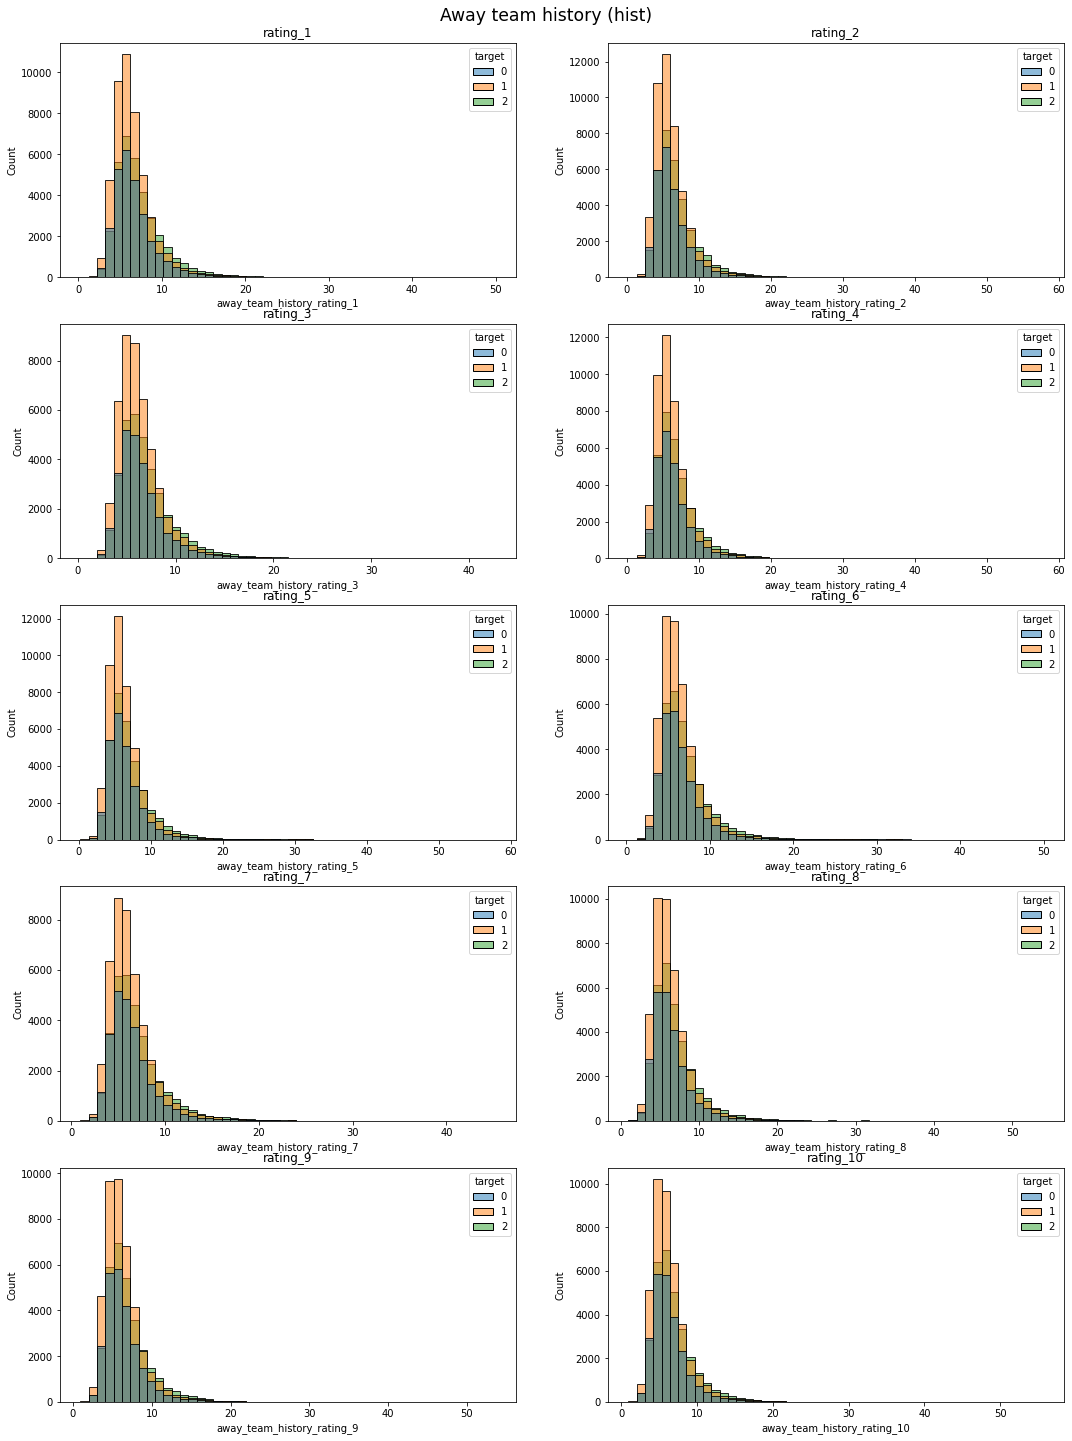

In [39]:
fig, axs = plt.subplots(5, 2, figsize= (18,25))

fig.suptitle("Away team history (hist)", size= "xx-large", y = 0.9)

cnt = 0
for i in range(0,10):
    sns.histplot(data = train_set, x= train_set[f'away_team_history_rating_{i+1}'], hue= train_set['target'], bins= 50, 
             palette= "tab10", ax= axs[cnt % 5][i % 2]).set_title(f'rating_{i+1}')

    if((i+1) % 2 == 0):
        cnt+=1

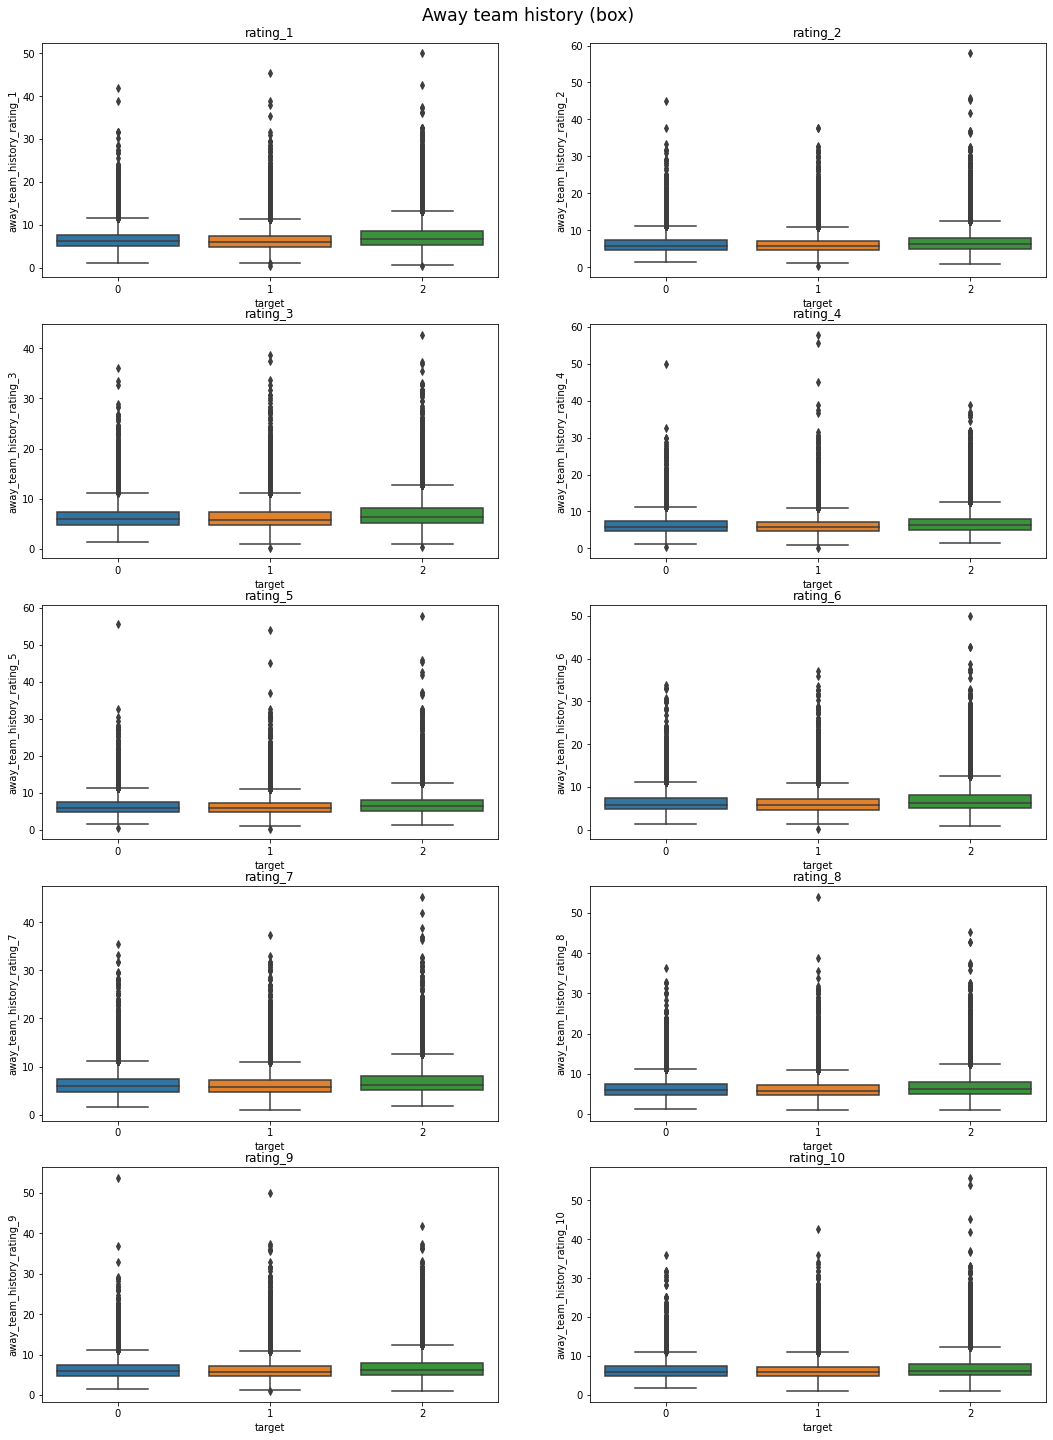

In [41]:
fig, axs = plt.subplots(5, 2, figsize= (18,25))

fig.suptitle("Away team history (box)", size= "xx-large", y = 0.9)

cnt = 0
for i in range(0,10):
    sns.boxplot(data = train_set, y= train_set[f'away_team_history_rating_{i+1}'], x= train_set['target'], 
             palette= "tab10", ax= axs[cnt % 5][i % 2]).set_title(f'rating_{i+1}')

    if((i+1) % 2 == 0):
        cnt+=1

In [42]:
# Median ATR array

arr_away_team_r_median = []
for i in range(1,11):
    arr_away_team_r_median.append(train_set[f'away_team_history_rating_{i}'].median())


In [43]:
# Fill all ATR{i} with median

for i in range(1,11):
    train_set[f'away_team_history_rating_{i}'] = train_set[f'away_team_history_rating_{i}'].fillna(arr_away_team_r_median[i-1])


for i in range(1,11):
    print(f'away_team_history_rating_{i} N_isna = ' + (str(train_set[f'away_team_history_rating_{i}'].isna().sum())))

away_team_history_rating_1 N_isna = 0
away_team_history_rating_2 N_isna = 0
away_team_history_rating_3 N_isna = 0
away_team_history_rating_4 N_isna = 0
away_team_history_rating_5 N_isna = 0
away_team_history_rating_6 N_isna = 0
away_team_history_rating_7 N_isna = 0
away_team_history_rating_8 N_isna = 0
away_team_history_rating_9 N_isna = 0
away_team_history_rating_10 N_isna = 0


C:\Users\admin\AppData\Local\Temp\ipykernel_3544\346503565.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[f'away_team_history_rating_{i}'] = train_set[f'away_team_history_rating_{i}'].fillna(arr_away_team_r_median[i-1])


### Conclusion (NA values)
    As seen, all team ratings homogeneous. So fill them with corresponding median.
    (IMPORTANT: fill the test set with the same corresponding median for each i-th rating)

In [44]:
# read the test dataset

test_set = pd.read_csv(os.path.join('dataset', 'test.csv'))

In [45]:
# Fill test set with corresponding i-th median

for i in range(1,11):
    test_set[f'home_team_history_rating_{i}'] = test_set[f'home_team_history_rating_{i}'].fillna(arr_home_team_r_median[i-1])

for i in range(1,11):
    test_set[f'away_team_history_rating_{i}'] = test_set[f'away_team_history_rating_{i}'].fillna(arr_away_team_r_median[i-1])


# Print result of filling NA values


for i in range(1,11):
    print(f'home_team_history_rating_{i} N_isna = ' + (str(test_set[f'home_team_history_rating_{i}'].isna().sum())))

print("##############################################################")

for i in range(1,11):
    print(f'away_team_history_rating_{i} N_isna = ' + (str(test_set[f'away_team_history_rating_{i}'].isna().sum())))


home_team_history_rating_1 N_isna = 0
home_team_history_rating_2 N_isna = 0
home_team_history_rating_3 N_isna = 0
home_team_history_rating_4 N_isna = 0
home_team_history_rating_5 N_isna = 0
home_team_history_rating_6 N_isna = 0
home_team_history_rating_7 N_isna = 0
home_team_history_rating_8 N_isna = 0
home_team_history_rating_9 N_isna = 0
home_team_history_rating_10 N_isna = 0
##############################################################
away_team_history_rating_1 N_isna = 0
away_team_history_rating_2 N_isna = 0
away_team_history_rating_3 N_isna = 0
away_team_history_rating_4 N_isna = 0
away_team_history_rating_5 N_isna = 0
away_team_history_rating_6 N_isna = 0
away_team_history_rating_7 N_isna = 0
away_team_history_rating_8 N_isna = 0
away_team_history_rating_9 N_isna = 0
away_team_history_rating_10 N_isna = 0


# Models try

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [53]:
y = train_set['target']
y = y.astype('int') # it's important

X = train_set.drop(columns= ['target'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state= 76)

In [54]:
y_train.unique()

array([2, 1, 0])

In [60]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

r_state = 76
models = { 'AdaBoostClassifier' : AdaBoostClassifier(random_state= r_state),
           'RandomForestClassifier': RandomForestClassifier(random_state= r_state),
           'GradientBoostingClassifier': GradientBoostingClassifier()}

In [62]:
for name, model in models.items():
    model.fit(X_train, y_train)

In [63]:
results = pd.DataFrame(columns= ['Model', 'Score'])


for name, model in models.items():
    
    row = [ name, log_loss(y_test, model.predict_proba(X_test))]
    results.loc[len(results)] = row

results

,Model,Score
0,AdaBoostClassifier,1.095762
1,RandomForestClassifier,1.047943
2,GradientBoostingClassifier,1.027789
